In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [5]:
data['Result'] = cancer.target

In [6]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Result
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:>

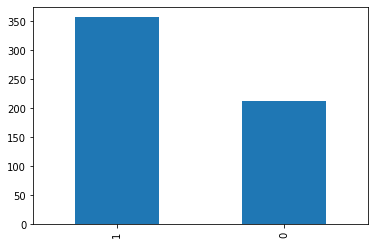

In [9]:
data['Result'].value_counts().plot(kind='bar')

In [10]:
import seaborn as sns

In [11]:
#sns.pairplot(data.drop('Result', axis=1))

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    LeaveOneOut,
    LeavePOut,
    StratifiedKFold,
    cross_validate,
    train_test_split,
)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Result', axis=1), data['Result'],
                                                   test_size=0.32, random_state=0)

In [15]:
logit = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

### K - Fold Cross Validatin 

In [16]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=4)

In [17]:
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=k_fold, # k-fold
)

In [18]:
clf['test_score']

array([0.96153846, 0.93506494, 0.93506494, 0.96103896, 0.90909091])

In [19]:
clf

{'fit_time': array([0.01938701, 0.11006522, 0.06463242, 0.01167154, 0.01161361]),
 'score_time': array([0.00755358, 0.02376223, 0.01633334, 0.00385833, 0.00368571]),
 'test_score': array([0.96153846, 0.93506494, 0.93506494, 0.96103896, 0.90909091]),
 'train_score': array([0.94805195, 0.97087379, 0.95469256, 0.95469256, 0.96116505])}

In [20]:
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9578951792544025  +-  0.007701156700248209
mean test set accuracy:  0.9403596403596403  +-  0.01954470840792648


## Repeated K fold

In [21]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)

print('We expect K * n performance metrics: ', 5*10)

clf = cross_validate(logit, X_train, y_train, 
                    scoring='accuracy', return_train_score=True, cv=rkf)

We expect K * n performance metrics:  50


In [22]:
print('Number of metrics obtained: ', len(clf['test_score']))

clf['test_score']

Number of metrics obtained:  50


array([0.93589744, 0.94805195, 0.97402597, 0.94805195, 0.93506494,
       0.93589744, 0.92207792, 0.93506494, 0.96103896, 0.94805195,
       0.91025641, 0.93506494, 0.97402597, 0.94805195, 0.88311688,
       0.96153846, 0.90909091, 0.93506494, 0.96103896, 0.93506494,
       0.96153846, 0.96103896, 0.94805195, 0.93506494, 0.92207792,
       0.92307692, 0.97402597, 0.97402597, 0.90909091, 0.94805195,
       0.98717949, 0.92207792, 0.93506494, 0.97402597, 0.90909091,
       0.92307692, 0.96103896, 0.94805195, 0.94805195, 0.92207792,
       0.92307692, 0.96103896, 0.94805195, 0.94805195, 0.92207792,
       0.96153846, 0.90909091, 0.94805195, 0.94805195, 0.98701299])

In [23]:
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9594550918337328  +-  0.007196518449125315
mean test set accuracy:  0.9427472527472527  +-  0.022289765023563016


## Leave One out

In [24]:
loo = LeaveOneOut()

print('We expect as many metrics as data in the train set: ', len(X_train))


We expect as many metrics as data in the train set:  386


In [25]:
clf =  cross_validate(
    logit,
    X_train, 
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=loo, # k-fold
)

In [26]:
print('Number of metrics obtained: ', len(clf['test_score']))

len(clf['test_score'])

Number of metrics obtained:  386


386

In [27]:
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9561402328241707  +-  0.001189724630277267
mean test set accuracy:  0.9455958549222798  +-  0.22681343451410146


## Leave P out

In [28]:
lpo = LeavePOut(p=2)

clf = cross_validate(logit, X_train, y_train, scoring='accuracy', cv=lpo)

KeyboardInterrupt: 

## Grid Search With Cross Validation

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## 1. K-Fold Cross Validation

In [46]:
logit = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid =dict(penalty=['l1','l2'],
                C=[0.1,1,10])

In [47]:
kf = KFold(n_splits=5, shuffle=True, random_state=4)

In [48]:
clf = GridSearchCV(logit, param_grid, scoring='accuracy',
                  cv=kf, refit=True)

In [49]:
search = clf.fit(X_train, y_train)

In [50]:
search.best_params_

{'C': 10, 'penalty': 'l1'}

In [53]:
results = pd.DataFrame(search.cv_results_)[['params','mean_test_score', 'std_test_score']]
results

,params,mean_test_score,std_test_score
0,"{'C': 0.1, 'penalty': 'l1'}",0.904063,0.021349
1,"{'C': 0.1, 'penalty': 'l2'}",0.927439,0.026792
2,"{'C': 1, 'penalty': 'l1'}",0.945521,0.017340
3,"{'C': 1, 'penalty': 'l2'}",0.940360,0.019545
4,"{'C': 10, 'penalty': 'l1'}",0.955911,0.017686
5,"{'C': 10, 'penalty': 'l2'}",0.950716,0.017320


In [55]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

array([<AxesSubplot:>], dtype=object)

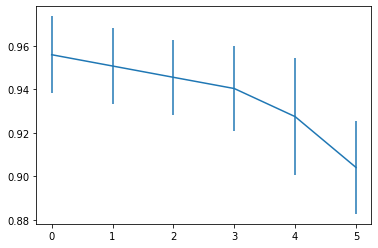

In [58]:
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

In [61]:
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9740932642487047
Test Accuracy:  0.9726775956284153


## 2.Repeated K-Fold

In [62]:
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=4)

clf = GridSearchCV(logit,
                  param_grid, scoring='accuracy',
                  cv=rkf, refit=True)
search = clf.fit(X_train, y_train)

In [63]:
search.best_params_

{'C': 10, 'penalty': 'l1'}

In [68]:
results = pd.DataFrame(search.cv_results_)
results = results[['params','mean_test_score','std_test_score']]

In [69]:
results.sort_values(by='mean_test_score', ascending=False, inplace=True)
results

,params,mean_test_score,std_test_score
4,"{'C': 10, 'penalty': 'l1'}",0.954402,0.021858
5,"{'C': 10, 'penalty': 'l2'}",0.949474,0.022312
2,"{'C': 1, 'penalty': 'l1'}",0.945594,0.024833
3,"{'C': 1, 'penalty': 'l2'}",0.943766,0.025355
1,"{'C': 0.1, 'penalty': 'l2'}",0.930330,0.026518
0,"{'C': 0.1, 'penalty': 'l1'}",0.916337,0.028513


In [74]:
results.reset_index(drop=True, inplace=True)

In [75]:
results

,params,mean_test_score,std_test_score
0,"{'C': 10, 'penalty': 'l1'}",0.954402,0.021858
1,"{'C': 10, 'penalty': 'l2'}",0.949474,0.022312
2,"{'C': 1, 'penalty': 'l1'}",0.945594,0.024833
3,"{'C': 1, 'penalty': 'l2'}",0.943766,0.025355
4,"{'C': 0.1, 'penalty': 'l2'}",0.930330,0.026518
5,"{'C': 0.1, 'penalty': 'l1'}",0.916337,0.028513


Text(0.5, 0, 'Hyperparameter space')

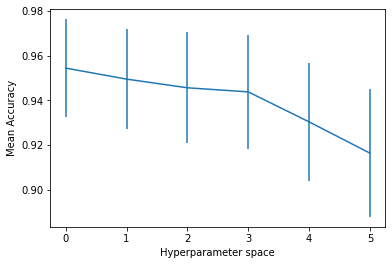

In [80]:
results['mean_test_score'].plot(yerr=[results['std_test_score'], 
                                      results['std_test_score']],
                               subplots=True)
plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space')

In [81]:
# let's get the predictions
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9740932642487047
Test Accuracy:  0.9726775956284153


## 3.Leave One Out

In [82]:
loo = LeaveOneOut()

In [83]:
clf  = GridSearchCV(logit, param_grid,
                   scoring='accuracy',
                   cv=loo,
                   refit=True)
search= clf.fit(X_train, y_train)

Text(0.5, 0, 'Hyperparameter space')

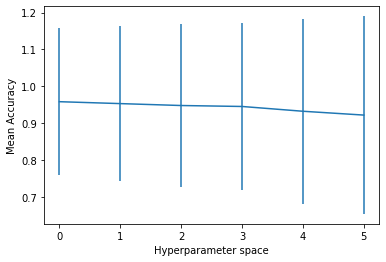

In [86]:
results = pd.DataFrame(search.cv_results_)
results = results[['params','mean_test_score','std_test_score']]
results.sort_values(by='mean_test_score', 
                   ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],
                                     results['std_test_score']],
                               subplots=True)
plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space')

In [88]:
 #let's get the predictions
train_preds = search.predict(X_train)
test_preds = search.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9740932642487047
Test Accuracy:  0.9726775956284153


## 3.Leave P Out

In [89]:
lpo = LeavePOut(p=2)

X_train_small = X_train.head(30)
y_train_small = y_train.head(30)

In [90]:
clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=lpo, # LPOCV
    refit=True, # refits best model to entire dataset
)

search = clf.fit(X_train_small, y_train_small)

# best hyperparameters
search.best_params_

{'C': 0.1, 'penalty': 'l1'}

Text(0.5, 0, 'Hyperparameter space')

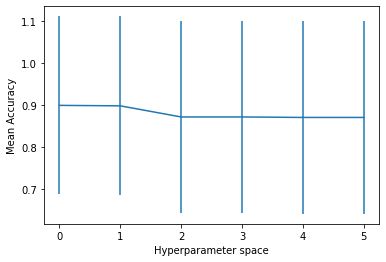

In [91]:
results = pd.DataFrame(search.cv_results_)
results = results[['params','mean_test_score','std_test_score']]
results.sort_values(by='mean_test_score', 
                   ascending=False, inplace=True)
results.reset_index(drop=True, inplace=True)
results['mean_test_score'].plot(yerr=[results['std_test_score'],
                                     results['std_test_score']],
                               subplots=True)
plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space')

### Group Cross-Validation

In this notebook we will demonstrate how to use 2 schemes of group cross-validation to first estimate the estimator generalization error, and then select the best hyperparameters.


In [92]:
from sklearn.model_selection import (GroupKFold,
                                    LeaveOneGroupOut, cross_validate,
                                    GridSearchCV)

In [97]:
brest_cancer_X, brest_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(brest_cancer_X)
y = pd.Series(brest_cancer_y).map({0:1, 1:0})

#add patients arbitrarily for demo
patients_list = [p for p in range(10)]
np.random.seed(1)
X['patient'] = np.random.choice(patients_list, size=len(X))

In [98]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,patient
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,5
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,8
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,9
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,5
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<AxesSubplot:>

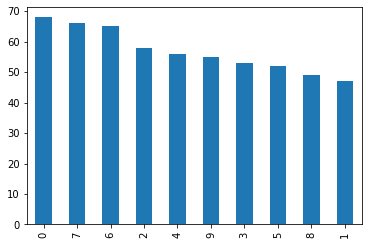

In [100]:
X['patient'].value_counts().plot.bar()

In [103]:
# split dataset into a train and test set
# this time, we leave data from 1 patient out
X_train = X[X['patient']!=7]

In [104]:
X_train.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,
            ...
            557, 558, 559, 561, 562, 564, 565, 566, 567, 568],
           dtype='int64', length=503)

In [105]:

y_train = y.iloc[X_train.index]

In [106]:
# patient 7
X_test = X[X['patient']==7]
y_test = y.iloc[X_test.index]

## 1.Group K-Fold Cross-Validation

In [107]:
# Logistic Regression
logit = LogisticRegression(
    penalty ='l2', C=10, solver='liblinear', random_state=4, max_iter=10000)


In [108]:
#grouped k-Fols Cross Validation
gkf = GroupKFold(n_splits=5)

#estimate Generlized error
clf = cross_validate(logit, 
                    X_train.drop('patient', axis=1),
                    y_train,
                    scoring='accuracy',
                    return_train_score=True,
                    cv=gkf.split(X_train.drop('patient', axis=1),
                                y_train, groups=X_train['patient']))

In [110]:
clf['test_score']

array([0.94117647, 0.98214286, 0.94392523, 0.94444444, 0.96296296])

In [134]:
col_list = []
for i in range(1, len(clf.values())+2):
    col_list.append(f"group {i}")
col_list
pd.DataFrame(clf.values(), columns=col_list,index = clf.keys())



,group 1,group 2,group 3,group 4,group 5
fit_time,0.014418,0.012572,0.011858,0.013090,0.014812
score_time,0.004363,0.003553,0.003494,0.005231,0.004288
test_score,0.941176,0.982143,0.943925,0.944444,0.962963
train_score,0.970115,0.964194,0.979798,0.967089,0.977215


In [135]:
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9716822186393209  +-  0.005934724812502724
mean test set accuracy:  0.954930393756672  +-  0.01565426086525203


In [136]:
# # fit the model to entire train set
logit.fit(
    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
    y_train)

# let's get the predictions
train_preds = logit.predict(X_train.drop('patient', axis=1))
test_preds = logit.predict(X_test.drop('patient', axis=1))

print('Train Accuracy: ', accuracy_score(y_train, train_preds))
print('Test Accuracy: ', accuracy_score(y_test, test_preds))

Train Accuracy:  0.9721669980119284
Test Accuracy:  0.9545454545454546


## 2.Leave One Group Out¶

In [137]:
# Cross-Validation
logo = LeaveOneGroupOut()

# estimate generalization error
clf =  cross_validate(
    logit,
    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
    y_train,
    scoring='accuracy',
    return_train_score=True,
    cv=logo.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
)

clf['test_score']

array([0.94117647, 0.9787234 , 0.9137931 , 0.96226415, 0.94642857,
       0.98076923, 0.98461538, 0.97959184, 0.98181818])

In [139]:
print('mean train set accuracy: ', np.mean(clf['train_score']), ' +- ', np.std(clf['train_score']))
print('mean test set accuracy: ', np.mean(clf['test_score']), ' +- ', np.std(clf['test_score']))

mean train set accuracy:  0.9681854158286476  +-  0.004935737590498333
mean test set accuracy:  0.9632422594001433  +-  0.02317043011437911


## 3.Leave 1 Group Out

In [141]:
# Cross-Validation
logo = LeaveOneGroupOut()

# search
clf = GridSearchCV(
    logit,
    param_grid,
    scoring='accuracy',
    cv=logo.split(X_train.drop('patient', axis=1), y_train, groups=X_train['patient']),
    refit=True, # refits best model to entire dataset
)

search = clf.fit(
    X_train.drop('patient', axis=1), # drop the patient column, this is not a predictor
    y_train,
)

# best hyperparameters
search.best_params_

{'C': 10, 'penalty': 'l1'}

Text(0.5, 0, 'Hyperparameter space')

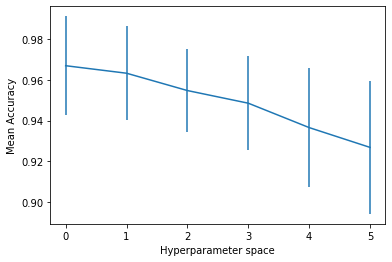

In [142]:
results = pd.DataFrame(search.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

results.reset_index(drop=True, inplace=True)

results['mean_test_score'].plot(yerr=[results['std_test_score'], results['std_test_score']], subplots=True)

plt.ylabel('Mean Accuracy')

plt.xlabel('Hyperparameter space')

# Nested Cross Validation

In [143]:
# load dataset
breast_cancer_X, breast_cancer_y = load_breast_cancer(return_X_y=True)
X = pd.DataFrame(breast_cancer_X)
y = pd.Series(breast_cancer_y).map({0:1, 1:0})

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [144]:
# split dataset into a train and test set

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((398, 30), (171, 30))

In [145]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,0.2034,1.1660,1.567,14.340,0.004957,0.021140,0.04156,0.008038,0.01843,0.003614,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,0.1485,1.5630,1.035,10.080,0.008875,0.009362,0.01808,0.009199,0.01791,0.003317,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.510,0.005518,0.015620,0.01994,0.007924,0.01799,0.002484,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.920,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.740,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.480,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


In [146]:
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [147]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,0.2034,1.1660,1.567,14.340,0.004957,0.021140,0.04156,0.008038,0.01843,0.003614,12.400,21.90,82.04,467.6,0.13520,0.20100,0.25960,0.07431,0.2941,0.09180
1,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,0.1485,1.5630,1.035,10.080,0.008875,0.009362,0.01808,0.009199,0.01791,0.003317,11.060,24.54,70.76,375.4,0.14130,0.10440,0.08423,0.06528,0.2213,0.07842
2,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,0.2200,0.9823,1.484,16.510,0.005518,0.015620,0.01994,0.007924,0.01799,0.002484,13.590,25.22,86.60,564.2,0.12170,0.17880,0.19430,0.08211,0.3113,0.08132
3,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,0.2577,0.4757,1.817,28.920,0.002866,0.009181,0.01412,0.006719,0.01069,0.001087,21.310,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
4,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,0.2241,1.5080,1.553,9.833,0.010190,0.010840,0.00000,0.000000,0.02659,0.004100,7.930,19.54,50.41,185.2,0.15840,0.12020,0.00000,0.00000,0.2932,0.09382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.740,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737
394,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.940,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750
395,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.480,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136
396,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.690,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559


## 1. Netsed Cross Validation

In [152]:
def nested_cross_val(model, grid):

    # configure the outer loop cross-validation procedure
    cv_outer = KFold(n_splits=5, shuffle=True, random_state=1)

    # configure the inner loop cross-validation procedure
    cv_inner = KFold(n_splits=5, shuffle=True, random_state=1)

    # enumerate splits
    outer_results = list()
    inner_results = list()

    for train_ix, test_ix in cv_outer.split(X_train):

        # split data
        xtrain, xtest = X_train.loc[train_ix, :], X_train.loc[test_ix, :]
        ytrain, ytest = y_train[train_ix], y_train[test_ix]

        # define search
        search = GridSearchCV(
            model, grid, scoring='accuracy', cv=cv_inner, refit=True)

        # execute search
        search.fit(xtrain, ytrain)

        # evaluate model on the hold out dataset
        yhat = search.predict(xtest)

        # evaluate the model
        accuracy = accuracy_score(ytest, yhat)

        # store the result
        outer_results.append(accuracy)
        
        inner_results.append(search.best_score_)

        # report progress
        print(' >> accuracy_outer=%.3f, accuracy_inner=%.3f, cfg=%s' %
              (accuracy, search.best_score_, search.best_params_))

    # summarize the estimated performance of the model
    print()
    print('accuracy_outer: %.3f +- %.3f' %
          (np.mean(outer_results), np.std(outer_results)))
    print('accuracy_inner: %.3f +- %.3f' %
          (np.mean(inner_results), np.std(inner_results)))

    return search.fit(X_train, y_train)

## Logistic regression

In [153]:
logit = LogisticRegression(penalty='l2',
                          C=1, 
                          solver='liblinear', random_state=4,
                          max_iter=10000)

#hyperparameter space
logit_param = dict(penalty=['l1','l2'],
                  C=[0.1, 1, 10])

In [154]:
logit_search = nested_cross_val(logit, logit_param)

 >> accuracy_outer=0.975, accuracy_inner=0.950, cfg={'C': 10, 'penalty': 'l1'}
 >> accuracy_outer=0.963, accuracy_inner=0.947, cfg={'C': 10, 'penalty': 'l1'}
 >> accuracy_outer=0.975, accuracy_inner=0.959, cfg={'C': 10, 'penalty': 'l1'}
 >> accuracy_outer=0.962, accuracy_inner=0.959, cfg={'C': 10, 'penalty': 'l1'}
 >> accuracy_outer=0.937, accuracy_inner=0.959, cfg={'C': 10, 'penalty': 'l1'}

accuracy_outer: 0.962 +- 0.014
accuracy_inner: 0.955 +- 0.005


In [155]:
# let's get the predictions

X_train_preds = logit_search.predict(X_train)
X_test_preds = logit_search.predict(X_test)

# let's examine the accuracy
print('Train accuracy: ', accuracy_score(y_train, X_train_preds))
print('Test accuracy: ', accuracy_score(y_test, X_test_preds))

Train accuracy:  0.9748743718592965
Test accuracy:  0.9707602339181286


## Random Forests

In [156]:
from sklearn.ensemble import RandomForestClassifier
rf_param = dict(
    n_estimators=[10, 50, 100, 200],
    min_samples_split=[0.1, 0.3, 0.5, 1.0],
    max_depth=[1,2,3,None],
    )

rf = RandomForestClassifier(n_estimators=100,
                           min_samples_split=2,
                           max_depth=3,
                           random_state=0,
                           n_jobs=-1)

In [157]:
rf_search = nested_cross_val(rf, rf_param)

 >> accuracy_outer=0.963, accuracy_inner=0.946, cfg={'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 200}
 >> accuracy_outer=0.950, accuracy_inner=0.953, cfg={'max_depth': 2, 'min_samples_split': 0.1, 'n_estimators': 10}
 >> accuracy_outer=0.938, accuracy_inner=0.956, cfg={'max_depth': None, 'min_samples_split': 0.1, 'n_estimators': 100}
 >> accuracy_outer=0.987, accuracy_inner=0.934, cfg={'max_depth': 2, 'min_samples_split': 0.1, 'n_estimators': 50}
 >> accuracy_outer=0.911, accuracy_inner=0.959, cfg={'max_depth': 2, 'min_samples_split': 0.1, 'n_estimators': 200}

accuracy_outer: 0.950 +- 0.025
accuracy_inner: 0.950 +- 0.009
